<a href="https://colab.research.google.com/github/leethanhvaan20302/desktop-tutorial/blob/main/Temperature%20Controller_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=003f4046e20c9c6889d0c2ac3fc0f3bd59be5870a723a36bedb6e73e7caf8221
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


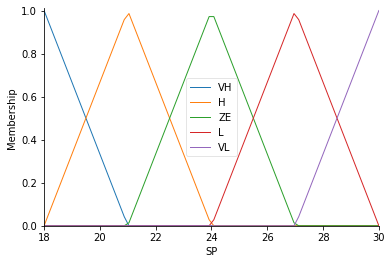

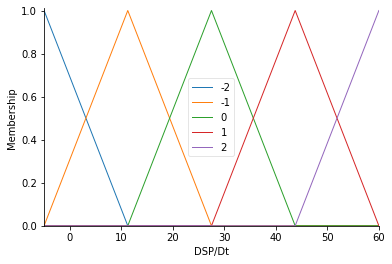

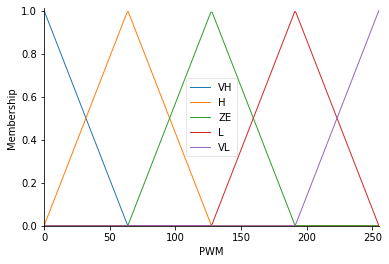

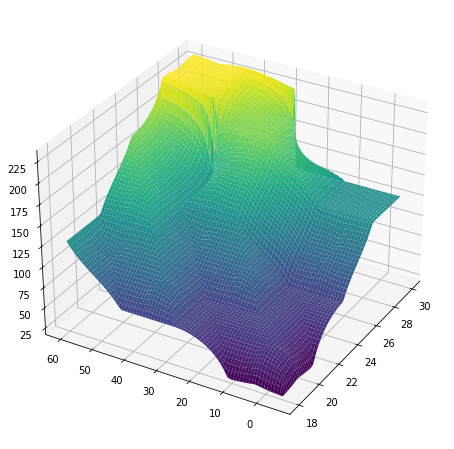

In [4]:
# Temperature Controller
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pi = math.pi
universe = np.linspace(18,30,72)
universe1 = np.linspace(-5,60,65)
universe2 = np.linspace(0,255,256)
SP = ctrl.Antecedent(universe, 'SP')
VALSS = ctrl.Antecedent(universe1, 'DSP/Dt')
PWM = ctrl.Consequent(universe2,'PWM')
item1 = ['VH' , 'H', 'ZE', 'L', 'VL']
item2 = ['-2' , '-1', '0', '1', '2']
SP.automf(names = item1)
VALSS.automf(names = item2)
PWM.automf(names = item1)
SP.view()
VALSS.view()
PWM.view()
rule0 = ctrl.Rule(antecedent = (SP['VH'] & VALSS['-2'])|
                  (SP['H'] & VALSS['-2'])|(SP['VH'] & VALSS['-1']),
                   consequent = PWM['VH'], label = 'Rule VL')
rule1 = ctrl.Rule(antecedent = (SP['VH'] & VALSS['0'])|
                  (SP['VH'] & VALSS['1'])|
                  (SP['H'] & VALSS['-1'])|(SP['H'] & VALSS['0'])
                  |(SP['ZE'] & VALSS['-2'])|(SP['ZE'] & VALSS['-1']),
                   consequent = PWM['H'], label = 'Rule L')
rule2 = ctrl.Rule(antecedent = (SP['VH'] & VALSS['2'])|
                  (SP['H'] & VALSS['1'])|
                  (SP['H'] & VALSS['2'])|(SP['ZE'] & VALSS['0'])
                  |(SP['ZE'] & VALSS['1'])|(SP['L'] & VALSS['-2'])
                  |(SP['L'] & VALSS['-1'])|(SP['VL'] & VALSS['-2'])
                  |(SP['VL'] & VALSS['-1']),
                   consequent = PWM['ZE'], label = 'Rule ZE')
rule3 = ctrl.Rule(antecedent = (SP['ZE'] & VALSS['2'])|
                  (SP['L'] & VALSS['0'])|
                  (SP['ZE'] & VALSS['2']),
                   consequent = PWM['L'], label = 'Rule H')
rule4 = ctrl.Rule(antecedent = (SP['L'] & VALSS['2'])|
                  (SP['VL'] & VALSS['1'])|
                  (SP['VL'] & VALSS['2']),
                   consequent = PWM['VL'], label = 'Rule VH')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 256*256+1)
upsampled = np.linspace(18,30,72)
upsampled1 = np.linspace(-5,60,72)
x,y = np.meshgrid(upsampled, upsampled1)
z = np.zeros_like(x)
for i in range(72):
  for j in range(72):
      sim.input['SP'] = x[i,j]
      sim.input['DSP/Dt'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['PWM']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
"""cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', alpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', alpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', alpha = 0.5 )"""
ax.view_init(30,210)


